<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/winter_semester/02_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

## 데이터 준비

In [1]:
# ctrl + spacebar : function preview
from sklearn.datasets import load_diabetes

In [2]:
diabets = load_diabetes()

In [3]:
#diabets은 dictionary 형태
print(diabets)


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
# diabets는 key value(data, target)으로 이루어져있음. shape는 R에서 dim() 역할
print(diabets.data.shape, diabets.target.shape)

(442, 10) (442,)


In [5]:
import matplotlib.pyplot as plt

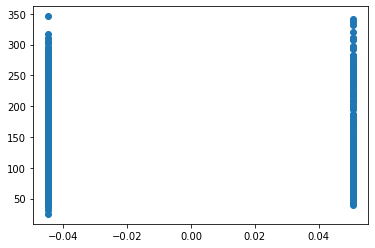

In [6]:
plt.scatter(diabets.data[:,1], diabets.target)

In [7]:
l1 = ['gd', 'iu', '나얼']
print(l1)

['gd', 'iu', '나얼']


In [8]:
l1[-3:-1]

['gd', 'iu']

In [9]:
X = diabets.data[:,2]
y = diabets.target

In [10]:
print(X)

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

## 경사하강법

In [11]:
# 1. 무작위로 {w, b}
w = 1.0
b = 1.0

In [12]:
# 2. X에서 sample을 가져와 y_hat 계산
y_hat = X[0] * w + b
print(y_hat)

1.0616962065186886


In [13]:
# 3. y와 y_hat 비교
print(y[0] - y_hat)

149.9383037934813


In [14]:
# 4. y와 y_hat의 결과가 가까워지도록 w,b를 조절

w_inc = w + 0.1 # 연산기호(+인지 - 인지)는 신경쓸 필요 없다!
y_hat_inc = w_inc * X[0] + b
print(y_hat_inc)

1.0678658271705574


In [15]:
w_rate = (y_hat_inc - y_hat)/(w_inc - w)
w_new = w + w_rate 

In [17]:
b_inc = b + 0.1 
y_hat_inc = w * X[0] + b_inc
print(y_hat_inc)


1.1616962065186887


In [19]:
b_rate = (y_hat_inc - y_hat) / (b_inc-b)
b_new = b + b_rate
b_new

2.0

## 오차역전파 사용

In [20]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = w + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [21]:
y_hat = X[1] * w_new + b_new
err = y[1] - y_hat
w_rate = X[1]
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

4.881693060477254 -74.41066251735467


In [22]:
for x_i, y_i in zip(X,y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w,b)

587.8654539985689 99.40935564531424


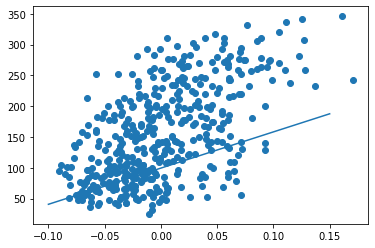

In [23]:
plt.scatter(X,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()

## 경사하강법을 파이썬으로 구현

In [25]:
# 경사하강법을 만들자!
class GradientDescent:
  # 1. w,b 설정
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  # 2. y_hat 계산
  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat

  # 3. 오차 계산
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  # 4. 이걸 반복하면 됨!
  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err = -(y_i-y_hat) 
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
  # 결론은 w, b를 외부에 제공해야 됨!


In [26]:
gd = GradientDescent()
gd.fit(X,y)

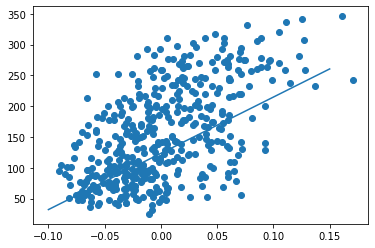

In [27]:
plt.scatter(X,y)
pt1 = (-0.1, -0.1 * gd.w + gd.b)
pt2 = (0.15, 0.15 * gd.w + gd.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()